## 2019~2021 세출예산 데이터 분석

### 1. 파일 디렉토리 확인 및 변경

In [7]:
# 현재디렉토리 확인
import os
os.getcwd()

'E:\\`21 데이터분석업무_최윤영\\결과물\\python_prj\\practice\\gg,sns,plt'

In [12]:
# 디렉토리 변경
import os
dir = 'C:/Users/user/Desktop/2021정부합동평가 제출용_최윤영/5. [일반] 세출예산 사용 현황분석/4. 데이터가공/2차 정제본_210908'
os.chdir(dir)
os.getcwd()

'C:\\Users\\user\\Desktop\\2021정부합동평가 제출용_최윤영\\5. [일반] 세출예산 사용 현황분석\\4. 데이터가공\\2차 정제본_210908'

### 2. 라이브러리 불러오기

In [13]:
import numpy as np
print(np.__version__)

import pandas as pd
print(pd.__version__)

import matplotlib as plt
print(plt.__version__)

import seaborn as sns
from pandas import Series, DataFrame

1.19.3
1.3.0
3.1.1


#### * 한글깨짐 방지

In [25]:
import matplotlib.font_manager as fm
import matplotlib as mpl 
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
plt.rc('font', family="NanumSquareRound")
# 설치된 폰트 출력
font_list = [font.name for font in fm.fontManager.ttflist]
font_list

['cmss10',
 'STIXGeneral',
 'DejaVu Sans Mono',
 'DejaVu Serif',
 'STIXGeneral',
 'STIXSizeThreeSym',
 'DejaVu Sans Mono',
 'STIXNonUnicode',
 'DejaVu Sans',
 'DejaVu Serif',
 'STIXSizeTwoSym',
 'cmb10',
 'STIXNonUnicode',
 'STIXSizeOneSym',
 'STIXSizeFourSym',
 'DejaVu Sans Display',
 'DejaVu Sans',
 'STIXSizeThreeSym',
 'DejaVu Sans Mono',
 'STIXSizeFourSym',
 'cmmi10',
 'STIXGeneral',
 'STIXSizeTwoSym',
 'STIXSizeOneSym',
 'STIXGeneral',
 'DejaVu Serif Display',
 'cmr10',
 'cmtt10',
 'DejaVu Serif',
 'DejaVu Sans Mono',
 'DejaVu Serif',
 'DejaVu Sans',
 'cmsy10',
 'STIXNonUnicode',
 'cmex10',
 'STIXNonUnicode',
 'STIXSizeFiveSym',
 'DejaVu Sans',
 'Jokerman',
 'Swis721 BT',
 '??????',
 'YJ BELLA Medium',
 'Neo Sans',
 'Palatino Linotype',
 '08SeoulHangang',
 'Webdings',
 'Bodoni MT',
 'Tw Cen MT',
 'Pristina',
 'HYmjrE',
 'Lucida Fax',
 'Nirmala UI',
 'HCR Dotum Ext',
 'Cambria',
 'Poor Richard',
 'Segoe UI',
 'MSugiJeong',
 'Georgia',
 'ParkAvenue BT',
 'HCR Dotum',
 '? ??',
 'Cand

### 3. 2019~2021 전체데이터 불러오기

In [16]:
dt=pd.read_csv('2019~2021 세출예산_2차정제완료취합_210908.csv',encoding='cp949')
dt.head()

,연도,국,부서,편성목번호,편성목,통계목번호,통계목,예산액(경정액)
0,2021,감사담당관,감사담당관,201,201 일반운영비,1,01 사무관리비,4434
1,2021,감사담당관,감사담당관,203,203 업무추진비,3,03 시책추진업무추진비,3700
2,2021,감사담당관,감사담당관,204,204 직무수행경비,3,03 특정업무경비,23880
3,2021,감사담당관,감사담당관,303,303 포상금,1,01 포상금,1000
4,2021,감사담당관,감사담당관,201,201 일반운영비,1,01 사무관리비,2650


In [17]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6931 entries, 0 to 6930
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   연도        6931 non-null   int64 
 1   국         6931 non-null   object
 2   부서        6931 non-null   object
 3   편성목번호     6931 non-null   int64 
 4   편성목       6931 non-null   object
 5   통계목번호     6931 non-null   int64 
 6   통계목       6931 non-null   object
 7   예산액(경정액)  6931 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 433.3+ KB


In [18]:
dt.describe()

,연도,편성목번호,통계목번호,예산액(경정액)
count,6931.000000,6931.000000,6931.000000,6.931000e+03
mean,2019.996826,262.427355,3.005338,3.257717e+05
std,0.803126,106.617864,2.803389,3.380177e+06
min,2019.000000,101.000000,1.000000,0.000000e+00
25%,2019.000000,201.000000,1.000000,2.280000e+03
50%,2020.000000,203.000000,2.000000,1.000000e+04
75%,2021.000000,307.000000,3.000000,6.000000e+04
max,2021.000000,802.000000,12.000000,1.342271e+08


### 4. 시각화 

#### 4-1. 연도에 따른 국별 세출예산 총액 막대그래프

In [21]:
#연도별 국별 예산합계 데이터 불러오기
dt2=pd.read_csv('2019~2021 국별 예산합계.csv',encoding='cp949')
dt2=dt2.set_index('연도')
dt2

,감사담당관,기획재정국,도시관리국,복지지원국,안전건설교통국,지속가능발전국,행정지원국
연도,,,,,,,
2019,344127,27337712,15113382,331405768,47888881,48835919,173524255
2020,437529,32046843,23933677,397509697,61772493,85829241,281407965
2021,387103,32340227,15413442,383748865,46096987,66408451,186141091


In [23]:
### 감사담당관 시각화를 위해 *20곱함
dt3=pd.read_csv('2019~2021 연도별 국별 예산합_ver2.csv',encoding='cp949')
dt3=dt3.sort_values('연도',ascending=False)
dt3=dt3.set_index('연도')
dt3

,복지지원국,행정지원국,지속가능발전국,안전건설교통국,기획재정국,도시관리국,감사담당관
연도,,,,,,,
2021,383748865,186141091,66408451,46096987,32340227,15413442,7742060
2020,397509697,281407965,85829241,61772493,32046843,23933677,8750580
2019,331405768,173524255,48835919,47888881,27337712,15113382,6882540


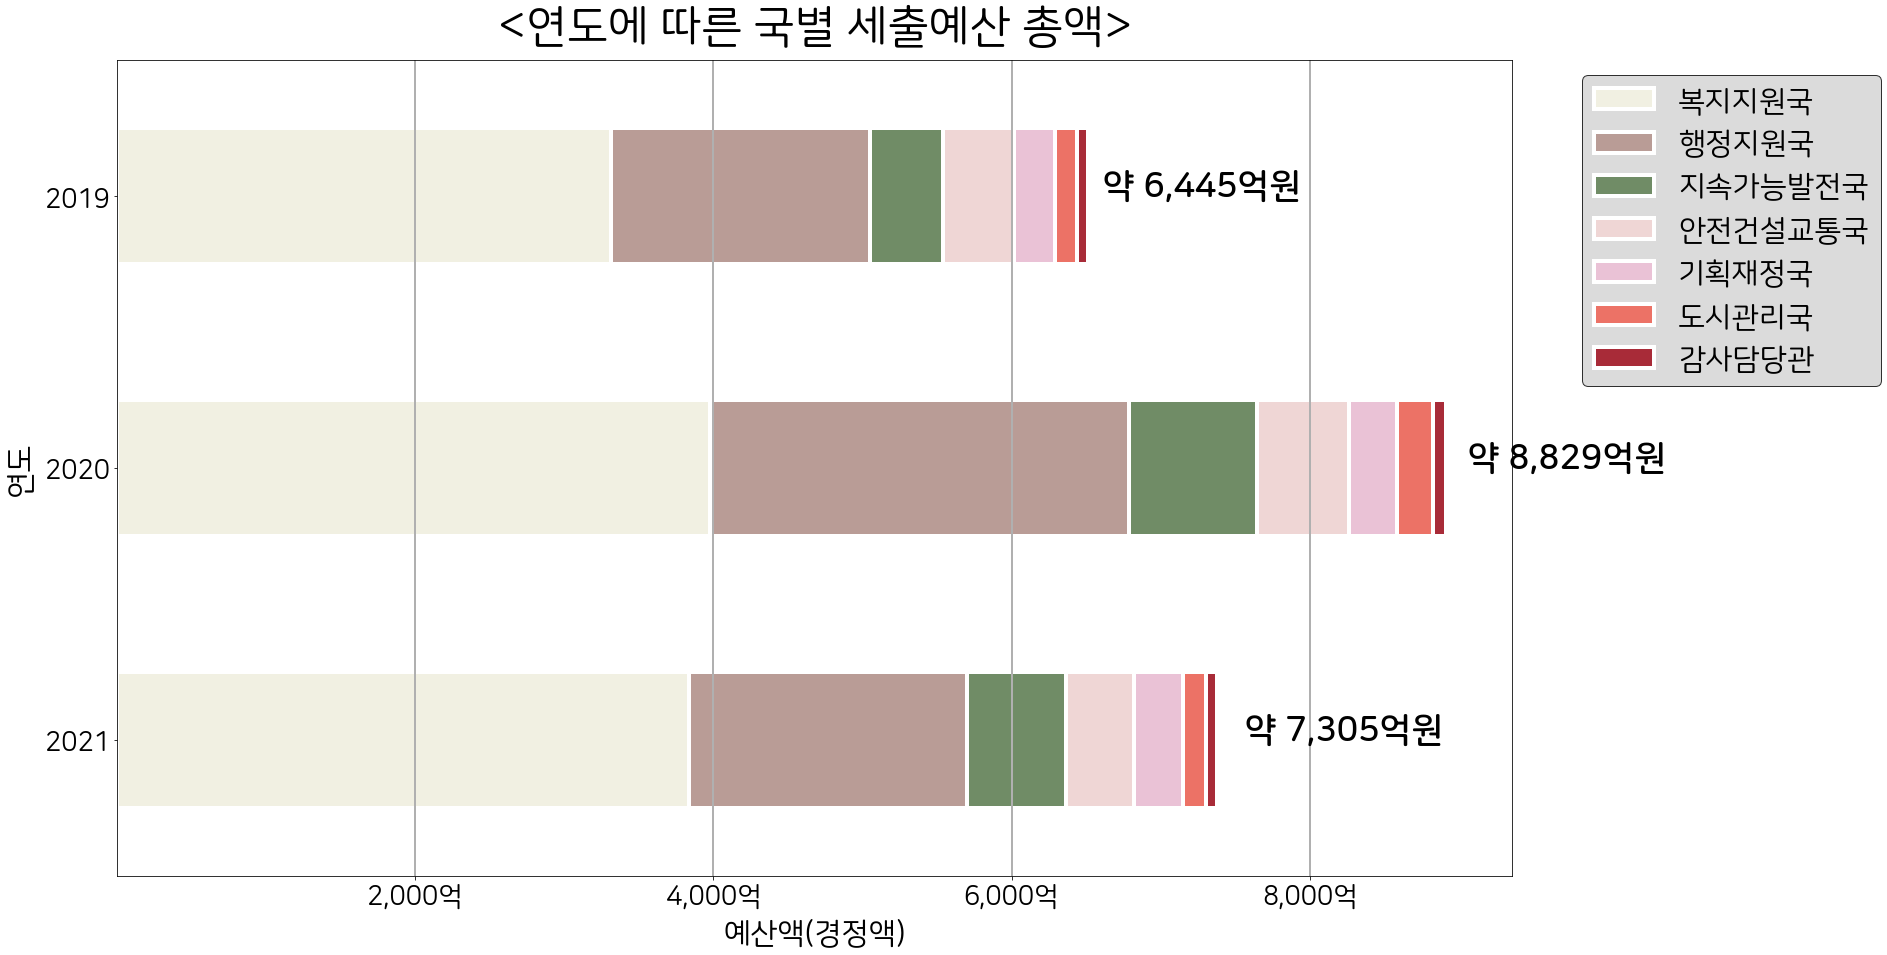

In [26]:
##print('Style name:', 'fast')
#plt.style.use('seaborn-ticks')   # 여러 스타일을 적용할 수도 있으나 간섭이 있으므로 가급적 1개 추천
colors=['#F1F0E2','#B99C96','#708C66','#EFD6D5','#EAC2D6','#EC7266','#A82B38']
#plt.figure(figsize=(30,10))
#errors = [2019,2020,2021]
error = np.random.rand(3)
dt3.plot(kind='barh',figsize=(25,15),stacked=True,
         xerr=error,ecolor="black",color=colors,edgecolor='white',linewidth=4)
x=[200000000,400000000,600000000,800000000]
plt.xlabel('예산액(경정액)',size=30,labelpad=10.0)
plt.ylabel('연도',size=30,labelpad=10.0)
plt.xticks(x,['2,000억','4,000억','6,000억','8,000억'],fontsize=27)
plt.yticks(fontsize=27)
leg=plt.legend(loc=(1.05, 0.6),fontsize=30,facecolor='lightgrey',frameon=True,edgecolor='black')
for text in leg.get_texts():
    text.set_color("black")
#arrowprops = dict(color='grey',arrowstyle="-|>") 
#plt.annotate(" 약 7,305억원", size=25,xy=(730536166,2),xytext=(790549200,2),arrowprops=arrowprops)
plt.annotate(" 약 6,445억원", size=35,xy=(644450044,0),xytext=(655450044,2),weight='bold')
plt.annotate(" 약 7,305억원", size=35,xy=(720536166,2),xytext=(750549200,0),weight='bold')
plt.annotate(" 약 8,829억원", size=35,xy=(882937445,1),xytext=(899937445,1),weight='bold')

plt.title("<연도에 따른 국별 세출예산 총액>",size=45,pad=20)
plt.grid(which='major',axis='x',linestyle='-',linewidth=2)
plt.show()

#### 4-2. 연도별 세출예산 상위 10개부서 막대그래프

In [27]:
# 데이터 
dt_2019=dt[dt['연도']==2019]
dt_2019_dept=dt_2019.groupby(['부서'])['예산액(경정액)'].sum()
dt_2019_dept=DataFrame(dt_2019_dept)

# 인덱스를 칼럼으로
import pandas as pd
dt_2019_dept=dt_2019_dept.reset_index().rename(columns={'부서':'부서'})
dt_2019_dept.head()

,부서,예산액(경정액)
0,가로관리과,786460
1,감사담당관,344127
2,건축과,1057372
3,공원녹지과,10604292
4,교육지원과,20651976


In [31]:
#정렬 및 탑10
dt_2019_dept=dt_2019_dept.sort_values('예산액(경정액)',ascending=False)
dt_2019_dept.head()
dt_2019_dept_10=dt_2019_dept[:10]
dt_2019_dept_10

,부서,예산액(경정액)
19,어르신장애인과,154806659
20,여성가족과,118850383
28,행정지원과,103734316
17,생활보장과,47739758
21,자원순환과,27036567
11,문화관광과,25818715
22,자치마을과,22440593
4,교육지원과,20651976
7,기획예산과,20454974
8,도로과,17275949


In [34]:
#막대색상지정
colors = ['#846057',] * 10
colors[1:3] = '#b75149'

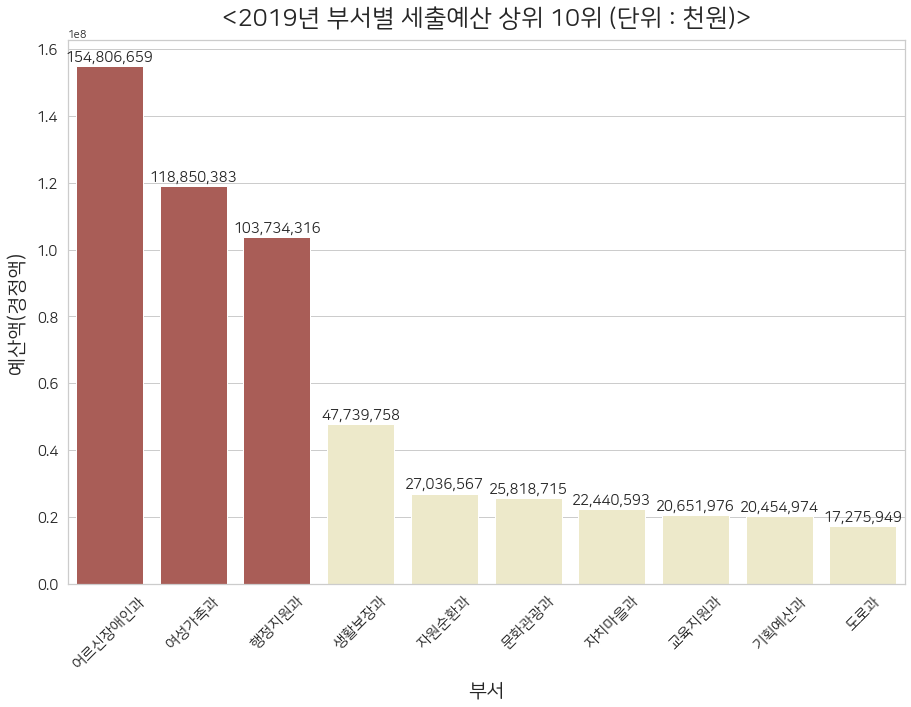

In [35]:
plt.figure(figsize=(15,10))
sns.set(font="NanumSquareRound",rc={"axes.unicode_minus":False},
       style='whitegrid')

p1=sns.barplot(x='부서',y='예산액(경정액)',data=dt_2019_dept_10, palette=["#f3eec4" if x!='어르신장애인과' and x!='여성가족과'  and x!='행정지원과'else '#b75149' for x in dt_2019_dept_10.부서],)
for p in p1.patches:
    p1.annotate("{:,}".format(int(p.get_height())), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points',fontsize=15)
plt.xticks(fontsize=15,rotation=45)
plt.yticks(fontsize=15)
plt.xlabel('부서',size=20,labelpad=10.0)
plt.ylabel('예산액(경정액)',size=20,labelpad=10.0)
plt.title('<2019년 부서별 세출예산 상위 10위 (단위 : 천원)>',fontsize=25,pad=15)
#plt.suptitle('dd')
#plt.legend(fontsize=15)

plt.show()

In [36]:
#2020 과별 예산합
dt_2020=dt[dt['연도']==2020]
dt_2020_dept=dt_2020.groupby(['부서'])['예산액(경정액)'].sum()
dt_2020_dept=DataFrame(dt_2020_dept)
# 인덱스를 칼럼으로
import pandas as pd
dt_2020_dept=dt_2020_dept.reset_index().rename(columns={'부서':'부서'})
dt_2020_dept.head()

#정렬 및 탑10
dt_2020_dept=dt_2020_dept.sort_values('예산액(경정액)',ascending=False)
dt_2020_dept.head()
dt_2020_dept_10=dt_2020_dept[:10]
dt_2020_dept_10

,부서,예산액(경정액)
19,어르신장애인과,173425155
20,여성가족과,123534431
29,행정지원과,110644901
22,자치마을과,106800585
17,생활보장과,63510550
18,신경제일자리과,39196265
14,복지정책과,37039561
21,자원순환과,32535178
4,교육지원과,26754256
8,도로과,23775495


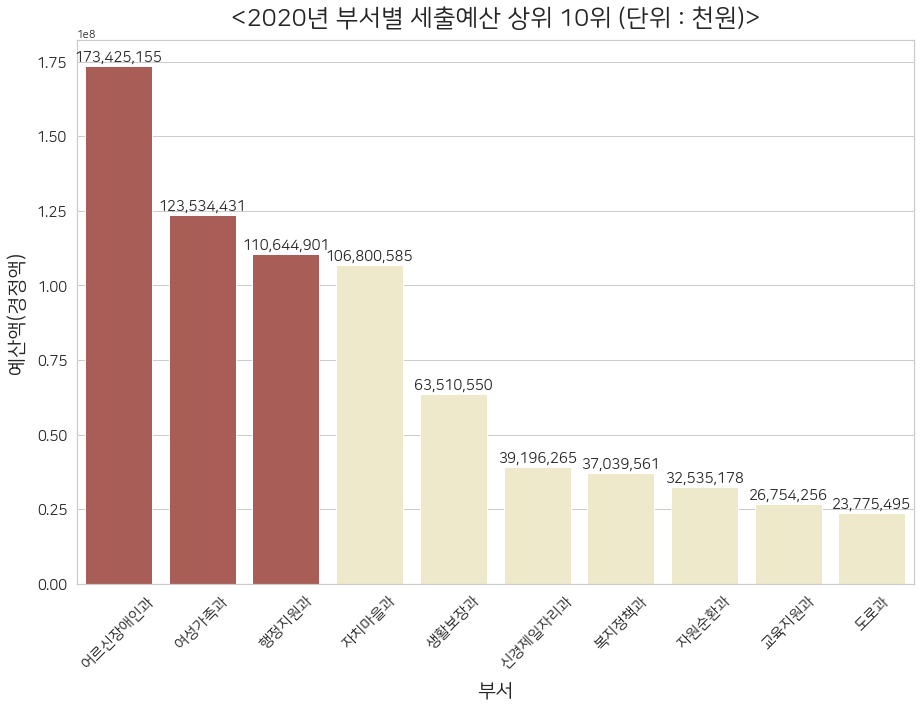

In [37]:

plt.figure(figsize=(15,10))
sns.set(font="NanumSquareRound",rc={"axes.unicode_minus":False},
       style='whitegrid')

p1=sns.barplot(x='부서',y='예산액(경정액)',data=dt_2020_dept_10, palette=["#f3eec4" if x!='어르신장애인과' and x!='여성가족과'  and x!='행정지원과'else '#b75149' for x in dt_2020_dept_10.부서],)
for p in p1.patches:
    p1.annotate("{:,}".format(int(p.get_height())), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points',fontsize=15)
plt.xticks(fontsize=15,rotation=45)
plt.yticks(fontsize=15)
plt.xlabel('부서',size=20,labelpad=10.0)
plt.ylabel('예산액(경정액)',size=20,labelpad=10.0)
plt.title('<2020년 부서별 세출예산 상위 10위 (단위 : 천원)>',fontsize=25,pad=15)
#plt.suptitle('dd')
#plt.legend(fontsize=15)

plt.show()

In [38]:
#2021 과별 예산합
dt_2021=dt[dt['연도']==2021]
dt_2021_dept=dt_2021.groupby(['부서'])['예산액(경정액)'].sum()
dt_2021_dept=DataFrame(dt_2021_dept)
dt_2021_dept

# 인덱스를 칼럼으로
import pandas as pd
dt_2021_dept=dt_2021_dept.reset_index().rename(columns={'부서':'부서'})
dt_2021_dept.head()
#정렬 및 탑10

dt_2021_dept=dt_2021_dept.sort_values('예산액(경정액)',ascending=False)
dt_2021_dept.head()
dt_2021_dept_10=dt_2021_dept[:10]
dt_2021_dept_10

,부서,예산액(경정액)
19,어르신장애인과,186821918
29,행정지원과,116564591
20,여성가족과,111773886
17,생활보장과,64683099
21,자원순환과,34019892
7,기획예산과,24130365
4,교육지원과,21746920
18,신경제일자리과,21414884
11,문화관광과,20936944
14,복지정책과,20469962


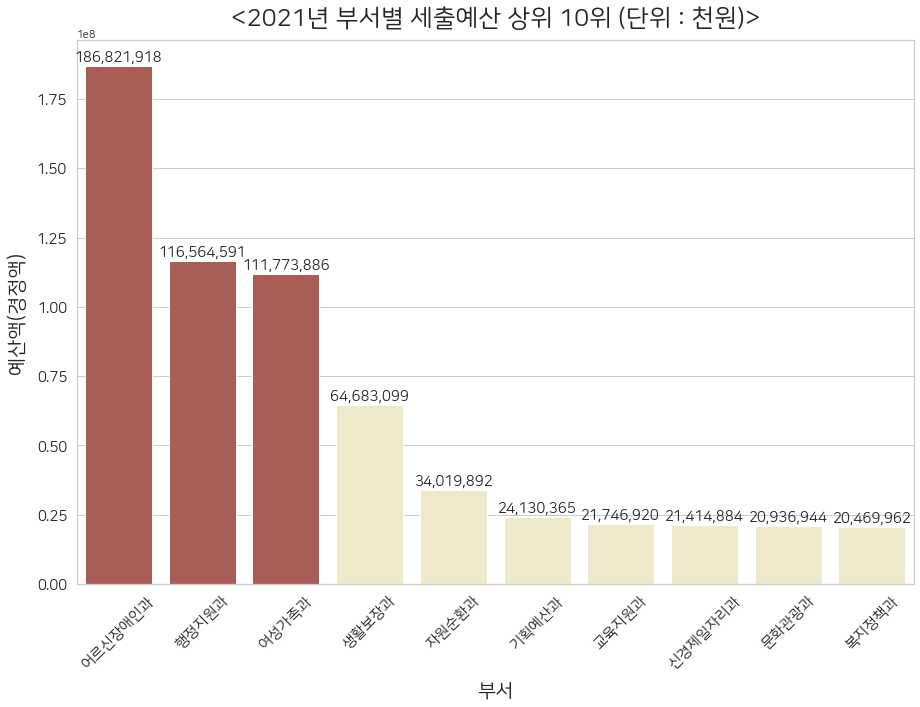

In [39]:

plt.figure(figsize=(15,10))
sns.set(font="NanumSquareRound",rc={"axes.unicode_minus":False},
       style='whitegrid')

p1=sns.barplot(x='부서',y='예산액(경정액)',data=dt_2021_dept_10, palette=["#f3eec4" if x!='어르신장애인과' and x!='여성가족과'  and x!='행정지원과' else '#b75149' for x in dt_2021_dept_10.부서])
for p in p1.patches:
    p1.annotate("{:,}".format(int(p.get_height())), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points',fontsize=15)
plt.xticks(fontsize=15,rotation=45)
plt.yticks(fontsize=15)
plt.xlabel('부서',size=20,labelpad=10.0)
plt.ylabel('예산액(경정액)',size=20,labelpad=10.0)
plt.title('<2021년 부서별 세출예산 상위 10위 (단위 : 천원)>',fontsize=25,pad=15)
#plt.suptitle('dd')
#plt.legend(fontsize=15)

plt.show()

#### 4-3. 기능별 세출예산 총액비율 파이 그래프

In [44]:
#데이터
dt_fnc=pd.read_csv('2019~2021기능별 세출예산_5가지카테고리화.csv',encoding='cp949')
dt_fnc

,연도,기능,기능(상세),예산액(경정액)
0,2019,일반행정및기타,공공질서및안전,1239354
1,2019,일반행정및기타,교육,16303103
2,2019,지역개발등,국토및지역개발,26554775
3,2019,일반행정및기타,기타,111325715
4,2019,문화및관광,문화및관광,25415976
5,2019,사회복지,사회복지,335906638
6,2019,지역개발등,산업/중소기업,4911837
7,2019,지역개발등,수송및교통,33420516
8,2019,일반행정및기타,예비비,6619433
9,2019,일반행정및기타,일반공공행정,62181298


In [45]:
#기능별합
dt_fnc2=dt_fnc.groupby(['연도','기능'])['예산액(경정액)'].sum()
dt_fnc2=DataFrame(dt_fnc2)
dt_fnc2=dt_fnc2.reset_index().rename(columns={'연도':'연도','기능':'기능'})
dt_fnc2

,연도,기능,예산액(경정액)
0,2019,문화및관광,25415976
1,2019,사회복지,335906638
2,2019,일반행정및기타,197668903
3,2019,지역개발등,64887128
4,2019,환경,20571399
5,2020,문화및관광,33290520
6,2020,사회복지,411455549
7,2020,일반행정및기타,299913080
8,2020,지역개발등,112379980
9,2020,환경,25898316


#### 2019년

In [47]:
dt_fnc_19=dt_fnc2[dt_fnc2['연도']==2019]
dt_fnc_19=dt_fnc_19.sort_values('예산액(경정액)',ascending=False)

In [104]:
colors = ['#A82B38','#B99C96','#F1F0E2','#EFD6D5','#EAC2D6','#EC7266','#708C66']
#colors = sns.color_palette("cubehelix", 11) #, pct 중심에서의 위치변경  : pctdistance=0.8
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
kw
bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="w", alpha=0,lw=0)


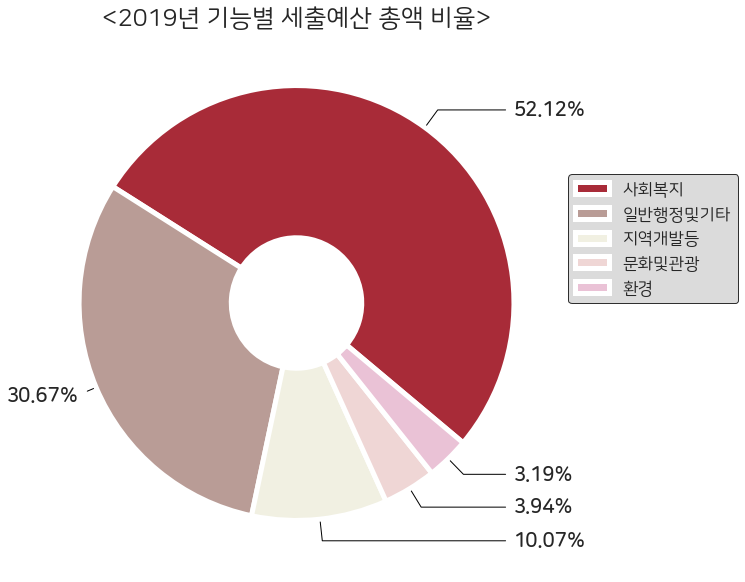

In [105]:
pct=['52.12%','30.67%','10.07%','3.94%','3.19%']
fig, ax = plt.subplots(figsize=(15, 10), subplot_kw=dict(aspect="equal"))
wedges, texts = ax.pie(dt_fnc_19['예산액(경정액)'],colors=colors,wedgeprops=wedgeprops, startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="W", lw=0.72)
kw = dict(arrowprops=dict(color='black',arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(pct[i], xy=(x,  y), xytext=(1*np.sign(x), 1.1*y),size=20,weight='bold',
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("<2019년 기능별 세출예산 총액 비율>",size=25)

plt.legend(labels=dt_fnc_19['기능'],loc=(1,.5),fontsize=17,facecolor='lightgrey',frameon=True,edgecolor='black')

plt.show()

#### 2020년

In [56]:
dt_fnc_20=dt_fnc2[dt_fnc2['연도']==2020]
dt_fnc_20=dt_fnc_20.sort_values('예산액(경정액)',ascending=False)
dt_fnc_20

,연도,기능,예산액(경정액)
6,2020,사회복지,411455549
7,2020,일반행정및기타,299913080
8,2020,지역개발등,112379980
5,2020,문화및관광,33290520
9,2020,환경,25898316


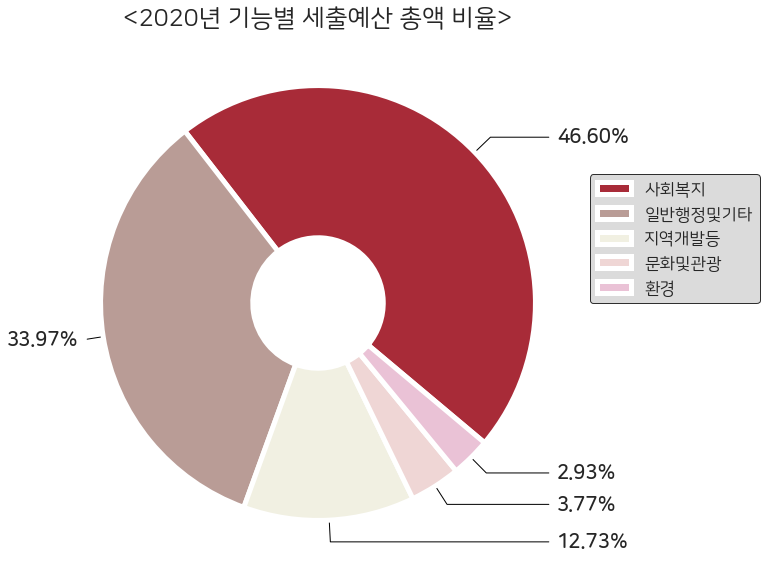

In [106]:
pct=['46.60%','33.97%','12.73%','3.77%','2.93%']
fig, ax = plt.subplots(figsize=(15, 10), subplot_kw=dict(aspect="equal"))
wedges, texts = ax.pie(dt_fnc_20['예산액(경정액)'],colors=colors,wedgeprops=wedgeprops, startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="W", lw=0.72)
kw = dict(arrowprops=dict(color='black',arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(pct[i], xy=(x,  y), xytext=(1.1*np.sign(x), 1.1*y),size=20,weight='bold',
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("<2020년 기능별 세출예산 총액 비율>",size=25)

plt.legend(labels=dt_fnc_20['기능'],loc=(1,.5),fontsize=17,facecolor='lightgrey',frameon=True,edgecolor='black')

plt.show()

#### 2021년

In [58]:
dt_fnc_21=dt_fnc2[dt_fnc2['연도']==2021]
dt_fnc_21=dt_fnc_21.sort_values('예산액(경정액)',ascending=False)
dt_fnc_21

,연도,기능,예산액(경정액)
11,2021,사회복지,396025046
12,2021,일반행정및기타,208870450
13,2021,지역개발등,68518185
10,2021,문화및관광,30372988
14,2021,환경,26749497


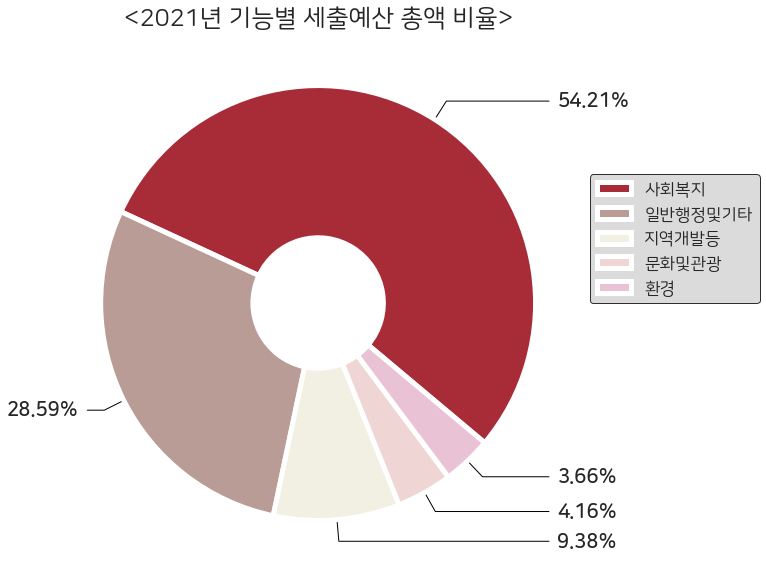

In [107]:
pct=['54.21%','28.59%','9.38%','4.16%','3.66%']
fig, ax = plt.subplots(figsize=(15, 10), subplot_kw=dict(aspect="equal"))
wedges, texts = ax.pie(dt_fnc_21['예산액(경정액)'],colors=colors,wedgeprops=wedgeprops, startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="W", lw=0.72)
kw = dict(arrowprops=dict(color='black',arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(pct[i], xy=(x,  y), xytext=(1.1*np.sign(x), 1.1*y),size=20,weight='bold',
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("<2021년 기능별 세출예산 총액 비율>",size=25)

plt.legend(labels=dt_fnc_21['기능'],loc=(1,.5),fontsize=17,facecolor='lightgrey',frameon=True,edgecolor='black')

plt.show()

#### 4-4. 복지지원국 세부분석 : 부서별 세출예산 상위5개 편성목 

In [67]:
#데이터
dt_ver2=pd.read_csv('2019~2021 세출예산_2차정제완료취합_통계목명추가_210916.csv',encoding='cp949')
dt_ver2.head()
dt_ver2_bokji=dt_ver2[dt_ver2['국']=='복지지원국']
dt_ver2_bokji.head()

,연도,국,부서,편성목번호,편성목,편성목명,통계목번호,통계목,통계목명,예산액(경정액)
1277,2021,복지지원국,복지정책과,201,201 일반운영비,일반운영비,1,01 사무관리비,사무관리비,2790
1278,2021,복지지원국,복지정책과,203,203 업무추진비,업무추진비,3,03 시책추진업무추진비,시책추진업무추진비,400
1279,2021,복지지원국,복지정책과,201,201 일반운영비,일반운영비,1,01 사무관리비,사무관리비,1800
1280,2021,복지지원국,복지정책과,307,307 민간이전,민간이전,5,05 민간위탁금,민간위탁금,3168551
1281,2021,복지지원국,복지정책과,402,402 민간자본이전,민간자본이전,3,03 민간위탁사업비,민간위탁사업비,152035


#### 2019년

In [68]:
#2019 과별 예산합
dt_ver2_bokji_19=dt_ver2_bokji[dt_ver2_bokji['연도']==2019]
dt_ver2_bokji_19=dt_ver2_bokji_19.groupby(['부서','편성목명'])['예산액(경정액)'].sum()
dt_ver2_bokji_19=DataFrame(dt_ver2_bokji_19)
dt_ver2_bokji_19
# 인덱스를 칼럼으로
import pandas as pd
dt_ver2_bokji_19=dt_ver2_bokji_19.reset_index().rename(columns={'부서':'부서'})
dt_ver2_bokji_19.head()

,부서,편성목명,예산액(경정액)
0,복지정책과,민간이전,4163900
1,복지정책과,민간자본이전,512223
2,복지정책과,반환금기타,62913
3,복지정책과,시설비및부대비,66908
4,복지정책과,업무추진비,51468


In [69]:
dt_ver2_bokji_19=dt_ver2_bokji_19.sort_values(by=['부서','예산액(경정액)'],ascending=False)
dt_ver2_bokji_19

,부서,편성목명,예산액(경정액)
36,여성가족과,민간이전,79891050
44,여성가족과,일반보전금,23794009
46,여성가족과,자산취득비,6590000
38,여성가족과,반환금기타,4784808
39,여성가족과,시설비및부대비,2240000
37,여성가족과,민간자본이전,731320
45,여성가족과,일반운영비,382420
43,여성가족과,인건비,163736
35,여성가족과,기금전출금,100000
42,여성가족과,연구개발비,79000


In [70]:
##### - 2019 부서별 편성목top5 및 기타로 변경 set

In [71]:
dt_ver2_bokji_19['순위']=dt_ver2_bokji_19.groupby('부서')['예산액(경정액)'].rank(ascending=False)
dt_ver2_bokji_19
dt_ver2_bokji_19=dt_ver2_bokji_19.reset_index().rename(columns={'편성목명':'편성목명'})
# rename rows other than top-n to 'Others'
dt_ver2_bokji_19.loc[dt_ver2_bokji_19.순위>= 6, '편성목명'] = '기타'
dt_ver2_bokji_19
# re-group by again
dt_top5_19=dt_ver2_bokji_19.groupby(['부서','편성목명']).sum()
dt_top5_19=dt_top5_19.reset_index().rename(columns={'편성목명':'편성목명'})
dt_top5_19

,부서,편성목명,index,예산액(경정액),순위
0,복지정책과,기타,41,353929,63.0
1,복지정책과,민간이전,0,4163900,1.0
2,복지정책과,민간자본이전,1,512223,4.0
3,복지정책과,인건비,7,729294,3.0
4,복지정책과,일반보전금,8,3942698,2.0
5,복지정책과,일반운영비,9,306924,5.0
6,생활보장과,기타,102,238647,51.0
7,생활보장과,민간이전,12,2762605,2.0
8,생활보장과,반환금기타,14,749625,3.0
9,생활보장과,인건비,18,123720,5.0


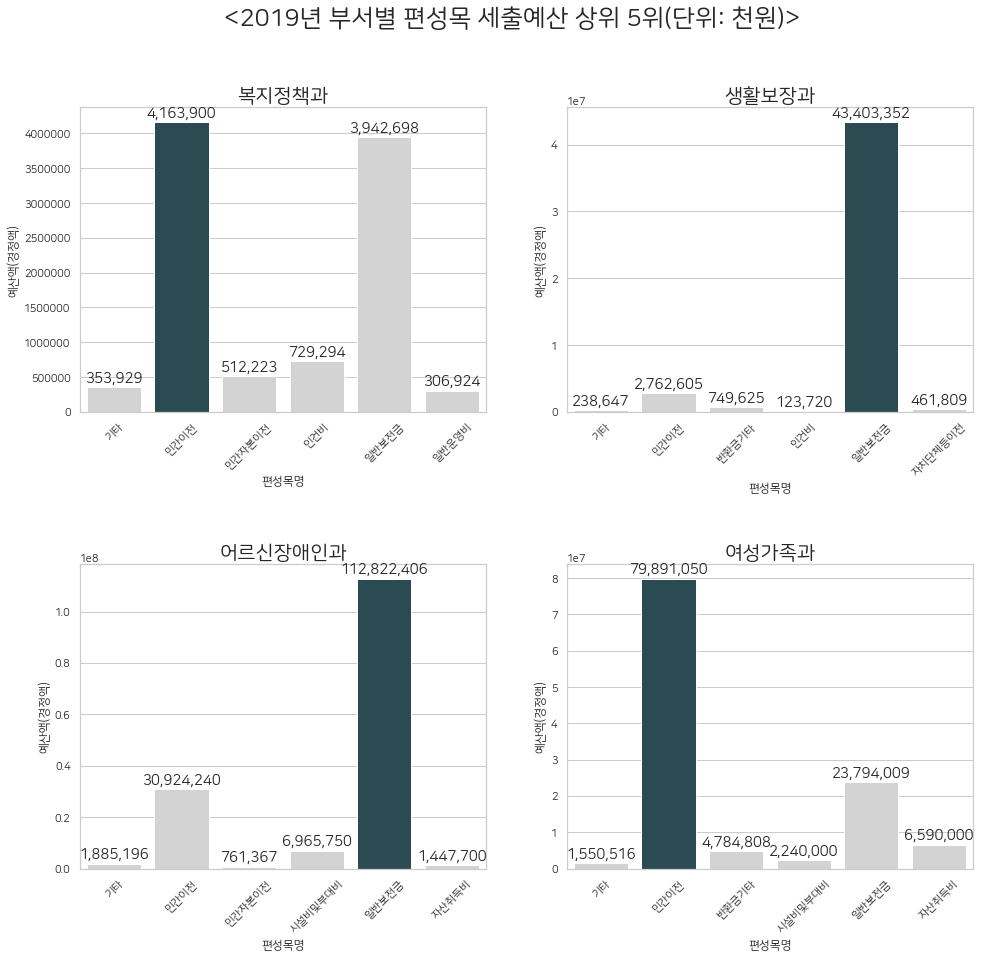

In [72]:
fig=plt.figure(figsize=(16,14))
fig.suptitle('<2019년 부서별 편성목 세출예산 상위 5위(단위: 천원)>',size=25)
sns.set(font="NanumSquareRound",rc={"axes.unicode_minus":False},
       style='whitegrid')
area01=fig.add_subplot(2,2,1)
area01.set_title('복지정책과',fontsize=20)
area02=fig.add_subplot(2,2,2)
area02.set_title('생활보장과',fontsize=20)
area03=fig.add_subplot(2,2,3)
area03.set_title('어르신장애인과',fontsize=20)
area04=fig.add_subplot(2,2,4)
area04.set_title('여성가족과',fontsize=20)

#부서별 막대그래프 
p1=sns.barplot(x='편성목명',y='예산액(경정액)',data=dt_top5_19[dt_top5_19['부서']=='복지정책과'], palette=['lightgrey' if x!='민간이전' else "#234f59" for x in dt_top5_19[dt_top5_19['부서']=='복지정책과'].편성목명],ax=area01)
for p in p1.patches:
    p1.annotate("{:,}".format(int(p.get_height())), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points',fontsize=15)
p1.set_xticklabels(p1.get_xticklabels(), rotation=45)

#부서별 막대그래프 
p2=sns.barplot(x='편성목명',y='예산액(경정액)',data=dt_top5_19[dt_top5_19['부서']=='생활보장과'], palette=['lightgrey' if x!='일반보전금' else "#234f59" for x in dt_top5_19[dt_top5_19['부서']=='생활보장과'].편성목명],ax=area02)
for p in p2.patches:
    p2.annotate("{:,}".format(int(p.get_height())), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points',fontsize=15)
p2.set_xticklabels(p2.get_xticklabels(), rotation=45)

#부서별 막대그래프 
p3=sns.barplot(x='편성목명',y='예산액(경정액)',data=dt_top5_19[dt_top5_19['부서']=='어르신장애인과'], palette=['lightgrey' if x!='일반보전금' else "#234f59" for x in dt_top5_19[dt_top5_19['부서']=='어르신장애인과'].편성목명],ax=area03)
for p in p3.patches:
    p3.annotate("{:,}".format(int(p.get_height())), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points',fontsize=15)
p3.set_xticklabels(p3.get_xticklabels(), rotation=45)

#부서별 막대그래프 
p4=sns.barplot(x='편성목명',y='예산액(경정액)',data=dt_top5_19[dt_top5_19['부서']=='여성가족과'], palette=['lightgrey' if x!='민간이전' else "#234f59" for x in dt_top5_19[dt_top5_19['부서']=='여성가족과'].편성목명],ax=area04)
for p in p4.patches:
    p4.annotate("{:,}".format(int(p.get_height())), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                
                   textcoords = 'offset points',fontsize=15)
p4.set_xticklabels(p4.get_xticklabels(), rotation=45)

#서브플랏간 간격조정
#hspace, wspace
#서브플롯 간의 간격을 위해 각각 figure의 너비와 높이에 대한 비율 조절
plt.subplots_adjust(hspace=0.5,wspace=0.2)

#### 2020년

In [74]:
#2020 과별 예산합
dt_ver2_bokji_20=dt_ver2_bokji[dt_ver2_bokji['연도']==2020]
dt_ver2_bokji_20=dt_ver2_bokji_20.groupby(['부서','편성목명'])['예산액(경정액)'].sum()
dt_ver2_bokji_20=DataFrame(dt_ver2_bokji_20)
# 인덱스를 칼럼으로
import pandas as pd
dt_ver2_bokji_20=dt_ver2_bokji_20.reset_index().rename(columns={'부서':'부서'})
dt_ver2_bokji_20.head()
dt_ver2_bokji_20=dt_ver2_bokji_20.sort_values(by=['부서','예산액(경정액)'],ascending=False)
dt_ver2_bokji_20.head(10)

,부서,편성목명,예산액(경정액)
36,여성가족과,민간이전,81041171
43,여성가족과,일반보전금,31131900
39,여성가족과,시설비및부대비,4267499
38,여성가족과,반환금기타,3424925
45,여성가족과,자산취득비,2373000
44,여성가족과,일반운영비,534476
37,여성가족과,민간자본이전,371927
42,여성가족과,인건비,191903
35,여성가족과,기금전출금,100000
41,여성가족과,여비,76830


In [75]:
#부서별 예산액 순위부여
dt_ver2_bokji_20['순위']=dt_ver2_bokji_20.groupby('부서')['예산액(경정액)'].rank(ascending=False)
dt_ver2_bokji_20
dt_ver2_bokji_20=dt_ver2_bokji_20.reset_index().rename(columns={'편성목명':'편성목명'})
dt_ver2_bokji_20.head(10)
# rename rows other than top-n to 'Others'
dt_ver2_bokji_20.loc[dt_ver2_bokji_20.순위>= 6, '편성목명'] = '기타'
dt_ver2_bokji_20
# re-group by again
dt_top5_20=dt_ver2_bokji_20.groupby(['부서','편성목명']).sum()
dt_top5_20=dt_top5_20.reset_index().rename(columns={'편성목명':'편성목명'})
dt_top5_20

,부서,편성목명,index,예산액(경정액),순위
0,복지정책과,기타,48,803495,76.0
1,복지정책과,민간이전,0,4493129,3.0
2,복지정책과,이주및재해보상금,6,23616694,1.0
3,복지정책과,인건비,7,1017862,4.0
4,복지정책과,일반보전금,8,6570169,2.0
5,복지정책과,일반운영비,9,538212,5.0
6,생활보장과,기타,89,256852,40.0
7,생활보장과,민간이전,13,4964321,2.0
8,생활보장과,반환금기타,14,1155844,3.0
9,생활보장과,인건비,18,128177,5.0


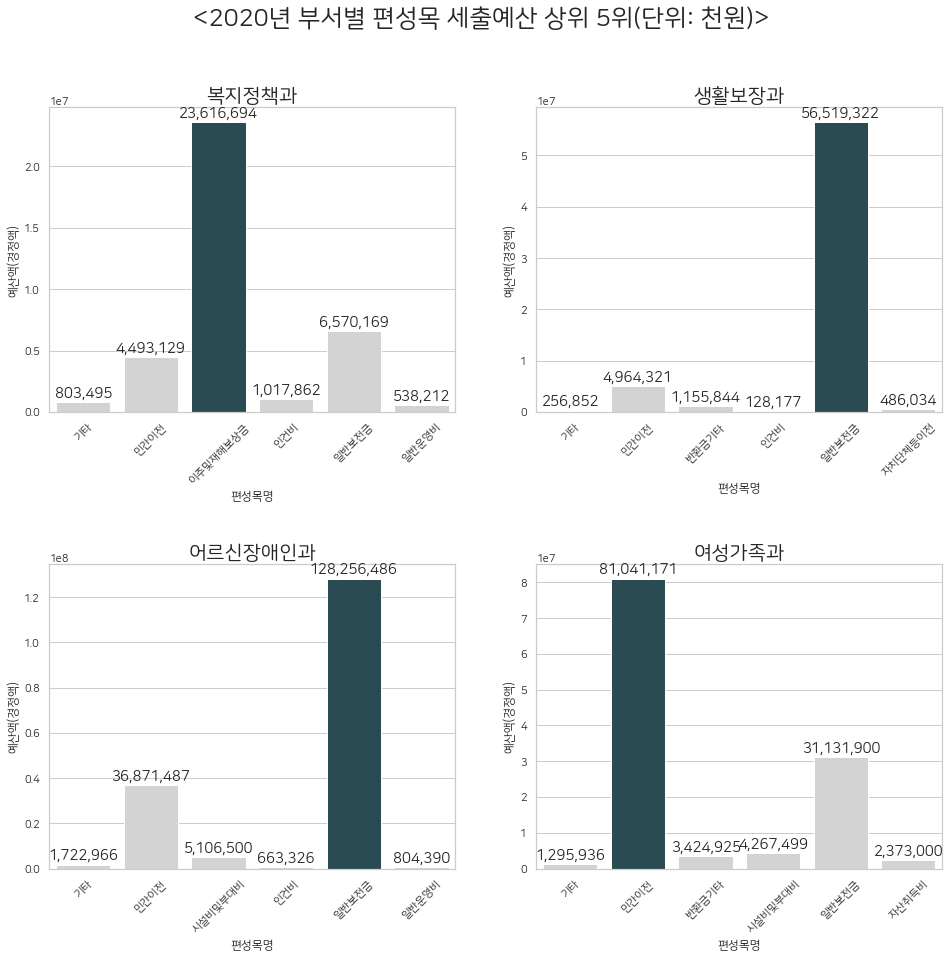

In [76]:
fig=plt.figure(figsize=(16,14))
fig.suptitle('<2020년 부서별 편성목 세출예산 상위 5위(단위: 천원)>',size=25)
sns.set(font="NanumSquareRound",rc={"axes.unicode_minus":False},
       style='whitegrid')
area01=fig.add_subplot(2,2,1)
area01.set_title('복지정책과',fontsize=20)
area02=fig.add_subplot(2,2,2)
area02.set_title('생활보장과',fontsize=20)
area03=fig.add_subplot(2,2,3)
area03.set_title('어르신장애인과',fontsize=20)
area04=fig.add_subplot(2,2,4)
area04.set_title('여성가족과',fontsize=20)

#부서별 막대그래프 
p1=sns.barplot(x='편성목명',y='예산액(경정액)',data=dt_top5_20[dt_top5_20['부서']=='복지정책과'], palette=["lightgrey" if x!='이주및재해보상금' else "#234f59" for x in dt_top5_20[dt_top5_20['부서']=='복지정책과'].편성목명],ax=area01)
for p in p1.patches:
    p1.annotate("{:,}".format(int(p.get_height())), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points',fontsize=15)
p1.set_xticklabels(p1.get_xticklabels(), rotation=45)

#부서별 막대그래프 
p2=sns.barplot(x='편성목명',y='예산액(경정액)',data=dt_top5_20[dt_top5_20['부서']=='생활보장과'], palette=["lightgrey" if x!='일반보전금' else "#234f59" for x in dt_top5_20[dt_top5_20['부서']=='생활보장과'].편성목명],ax=area02)
for p in p2.patches:
    p2.annotate("{:,}".format(int(p.get_height())), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points',fontsize=15)
p2.set_xticklabels(p2.get_xticklabels(), rotation=45)

#부서별 막대그래프 
p3=sns.barplot(x='편성목명',y='예산액(경정액)',data=dt_top5_20[dt_top5_20['부서']=='어르신장애인과'], palette=["lightgrey" if x!='일반보전금' else "#234f59" for x in dt_top5_20[dt_top5_20['부서']=='어르신장애인과'].편성목명],ax=area03)
for p in p3.patches:
    p3.annotate("{:,}".format(int(p.get_height())), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points',fontsize=15)
p3.set_xticklabels(p3.get_xticklabels(), rotation=45)

#부서별 막대그래프 
p4=sns.barplot(x='편성목명',y='예산액(경정액)',data=dt_top5_20[dt_top5_20['부서']=='여성가족과'], palette=["lightgrey" if x!='민간이전' else "#234f59" for x in dt_top5_20[dt_top5_20['부서']=='여성가족과'].편성목명],ax=area04)
for p in p4.patches:
    p4.annotate("{:,}".format(int(p.get_height())), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points',fontsize=15)
p4.set_xticklabels(p4.get_xticklabels(), rotation=45)

#서브플랏간 간격조정
#hspace, wspace
#서브플롯 간의 간격을 위해 각각 figure의 너비와 높이에 대한 비율 조절
plt.subplots_adjust(hspace=0.5,wspace=0.2)

#### 2021년

In [77]:
#2020 과별 예산합
dt_ver2_bokji_21=dt_ver2_bokji[dt_ver2_bokji['연도']==2021]
dt_ver2_bokji_21=dt_ver2_bokji_21.groupby(['부서','편성목명'])['예산액(경정액)'].sum()
dt_ver2_bokji_21=DataFrame(dt_ver2_bokji_21)
dt_ver2_bokji_21

# 인덱스를 칼럼으로
import pandas as pd
dt_ver2_bokji_21=dt_ver2_bokji_21.reset_index().rename(columns={'부서':'부서'})
dt_ver2_bokji_21.head()

#내림차순 정렬
dt_ver2_bokji_21=dt_ver2_bokji_21.sort_values(by=['부서','예산액(경정액)'],ascending=False)
dt_ver2_bokji_21.head(10)

#부서별 예산액 순위부여
dt_ver2_bokji_21['순위']=dt_ver2_bokji_21.groupby('부서')['예산액(경정액)'].rank(ascending=False)
dt_ver2_bokji_21
dt_ver2_bokji_21=dt_ver2_bokji_21.reset_index().rename(columns={'편성목명':'편성목명'})
dt_ver2_bokji_21.head(10)

# rename rows other than top-n to 'Others'
dt_ver2_bokji_21.loc[dt_ver2_bokji_21.순위>= 6, '편성목명'] = '기타'
dt_ver2_bokji_21
# re-group by again
dt_top5_21=dt_ver2_bokji_21.groupby(['부서','편성목명']).sum()
dt_top5_21=dt_top5_21.reset_index().rename(columns={'편성목명':'편성목명'})
dt_top5_21


,부서,편성목명,index,예산액(경정액),순위
0,복지정책과,기타,19,492988,40.0
1,복지정책과,민간이전,0,4230473,2.0
2,복지정책과,이주및재해보상금,5,2500000,3.0
3,복지정책과,인건비,6,495121,4.0
4,복지정책과,일반보전금,7,12361840,1.0
5,복지정책과,일반운영비,8,389540,5.0
6,생활보장과,기타,36,115380,21.0
7,생활보장과,민간이전,10,4896480,2.0
8,생활보장과,인건비,14,128222,4.0
9,생활보장과,일반보전금,15,59109908,1.0


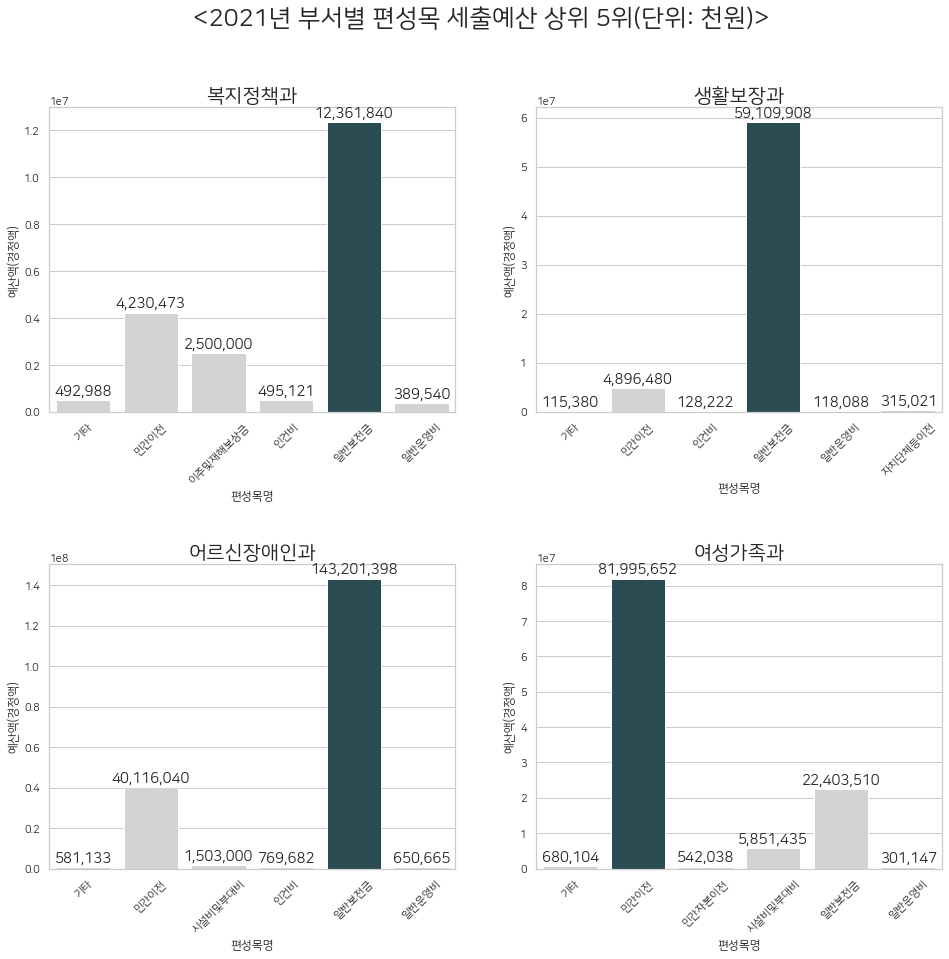

In [78]:
fig=plt.figure(figsize=(16,14))
fig.suptitle('<2021년 부서별 편성목 세출예산 상위 5위(단위: 천원)>',size=25)
sns.set(font="NanumSquareRound",rc={"axes.unicode_minus":False},
       style='whitegrid')
area01=fig.add_subplot(2,2,1)
area01.set_title('복지정책과',fontsize=20)
area02=fig.add_subplot(2,2,2)
area02.set_title('생활보장과',fontsize=20)
area03=fig.add_subplot(2,2,3)
area03.set_title('어르신장애인과',fontsize=20)
area04=fig.add_subplot(2,2,4)
area04.set_title('여성가족과',fontsize=20)

#부서별 막대그래프 
p1=sns.barplot(x='편성목명',y='예산액(경정액)',data=dt_top5_21[dt_top5_21['부서']=='복지정책과'], palette=["lightgrey" if x!='일반보전금' else "#234f59" for x in dt_top5_21[dt_top5_21['부서']=='복지정책과'].편성목명],ax=area01)
for p in p1.patches:
    p1.annotate("{:,}".format(int(p.get_height())), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points',fontsize=15)
p1.set_xticklabels(p1.get_xticklabels(), rotation=45)

#부서별 막대그래프 
p2=sns.barplot(x='편성목명',y='예산액(경정액)',data=dt_top5_21[dt_top5_21['부서']=='생활보장과'], palette=["lightgrey" if x!='일반보전금' else "#234f59" for x in dt_top5_21[dt_top5_21['부서']=='생활보장과'].편성목명],ax=area02)
for p in p2.patches:
    p2.annotate("{:,}".format(int(p.get_height())), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points',fontsize=15)
p2.set_xticklabels(p2.get_xticklabels(), rotation=45)

#부서별 막대그래프 
p3=sns.barplot(x='편성목명',y='예산액(경정액)',data=dt_top5_21[dt_top5_21['부서']=='어르신장애인과'], palette=["lightgrey" if x!='일반보전금' else "#234f59" for x in dt_top5_21[dt_top5_21['부서']=='어르신장애인과'].편성목명],ax=area03)
for p in p3.patches:
    p3.annotate("{:,}".format(int(p.get_height())), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points',fontsize=15)
p3.set_xticklabels(p3.get_xticklabels(), rotation=45)

#부서별 막대그래프 
p4=sns.barplot(x='편성목명',y='예산액(경정액)',data=dt_top5_21[dt_top5_21['부서']=='여성가족과'], palette=["lightgrey" if x!='민간이전' else "#234f59" for x in dt_top5_21[dt_top5_21['부서']=='여성가족과'].편성목명],ax=area04)
for p in p4.patches:
    p4.annotate("{:,}".format(int(p.get_height())), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points',fontsize=15)
p4.set_xticklabels(p4.get_xticklabels(), rotation=45)

#서브플랏간 간격조정
#hspace, wspace
#서브플롯 간의 간격을 위해 각각 figure의 너비와 높이에 대한 비율 조절
plt.subplots_adjust(hspace=0.5,wspace=0.2)